# Template subtraction notebook



This is an exmaple of how to set up AutoPhot in order to perform Template Subtraction using HOTPANTS by Andy Becker (https://github.com/acbecker/hotpants)

Autophot is set up to accpet templates in ugriz, UVBRI and JHK bands, although please fully read notebook to note limitations

The current version of Autphot cannot distinguished between templates from/for different instruments. For exmaple if you have two science-ready images from NTT+EFOSC2 and the NOT and a temaple from NTT+EFOSC2, Autophot will apply template subtraction to both images using the same templates.


Future versions of AutoPhot will allow for Telescope\Instrument specific templates. 

Load in the syntax file - we will need to update a few options to prepare AutoPhot for template subtractions

In [1]:
from autophot.prep_input import load
syntax = load()

Default input loaded in from: 
/Users/seanbrennan/Documents/autophot_development/AutoPHoT_conda/autophot/autophot/databases/default_input.yml


Firstly lets set up the folder structure for our templates - This must be placed in the wokring directory and **not** the output directory (i.e. the '_REDUCED' folder).

The cell below will set up the correct template structure. For completeness we will setup the folder structure for all sloan bands i.e. ugriz and JHK bands - Due to the case sensitive nature of directory naming conventions, the current version of AutoPhot cannot accept sloan-r and johnson cousins-R bands (for example, the same for i and I bands etc) these will need to be manually changed - This is fixed in a upcoming version of Autophot

In [2]:
# First lets set up a science ready image - similar to other notebooks 


# Lets put an example science image in a folder on the desktop 
desktop_loc = '/Users/seanbrennan/Desktop'

# Built in function to move some example data onto the users desktop
from autophot.example import save_example_data
fpath = save_example_data.save_fits_to_desktop(new_path = desktop_loc) 

Successful copy of example.fits written to:
/Users/seanbrennan/Desktop/autophot_example/example.fits


In [3]:
import os

# Lets just see that everything is in place 
dirpath = os.path.dirname(fpath)

print('list of contects in: %s \n -> %s' % (dirpath,os.listdir(dirpath)))# returns list of folder contents

list of contects in: /Users/seanbrennan/Desktop/autophot_example 
 -> ['.DS_Store', 'tns_objects', 'catalog_queries', 'example.fits', 'templates', 'telescope.yml']


In [4]:
# set working directory - or where you have your telescope.yml, etc. files
# for me it is on my dekstop 
syntax['wdir'] = desktop_loc
print('Setting work directory (wdir) to: %s' % dirpath)

'''
need to set the 'fits_dir' (work on all files in a folder) command and not 'fname' (work on a single file only)

or you own science purpose set syntax['fits_dir'] to where you have all your images
e.g. syntax['fits_dir'] = '/Users/lgalbany/Desktop/SN2020uxz'
'''
syntax['fits_dir'] = dirpath
syntax['fname'] = None


Setting work directory (wdir) to: /Users/seanbrennan/Desktop/autophot_example


In [5]:
# set the catalog as before # Can choose skymapper, apass, pan_starrs, 2mass
syntax['catalog'] = 'skymapper'

In [6]:
# Select a source and update our syntax input
# For this example lets use the location of AT2016jbu as that won't be removed in the template subtraction
ra  = 114.108167
dec = -69.548681

from astropy.coordinates import SkyCoord 
c = SkyCoord(ra,dec , unit="deg") 


# Not tell autophot where to look
syntax['target_ra'] = c.ra.degree
syntax['target_dec'] = c.dec.degree

# Setting up template folder structure

Okay so now lets build the template folder structure - this can be done mamually but for the purpose of the npotebook we can code a short script to do it for us

In [7]:
# First make a folder called 'templates' in wdir
main_template_foler = os.path.join(dirpath,'templates')

print('Location of templates will be in : %s' % main_template_foler)

if not os.path.exists(main_template_foler): # if the directory does not exis
    os.mkdir(main_template_foler )


Location of templates will be in : /Users/seanbrennan/Desktop/autophot_example/templates


In [8]:
# Lets check if it was created successfully 
print('list of contects in: %s \n -> %s' % (dirpath,os.listdir(dirpath)))# returns list of folder contents

list of contects in: /Users/seanbrennan/Desktop/autophot_example 
 -> ['.DS_Store', 'tns_objects', 'catalog_queries', 'example.fits', 'templates', 'telescope.yml']


As the MACos is case sensitive we need to distiguish between the sloan-r template folder and the JC R band template folder (for example, also applicable to u/U and i/I etc) to fix this we name any sloan template folder with a "p" e.g. r_template -> rp_template and so on

In [9]:
#Now lets make the correct folder structure

# List of filters we want to make folders for 
filter_list = ['up','gp','rp','ip','zp','U','B','V','R','I','J','H','K']

for f in filter_list:
    
    
    filter_template_name = f + '_template'
    
    filter_template_location = os.path.join(main_template_foler,filter_template_name)
    
    print('Creating folder for %s-band at: %s' % (f,filter_template_location))
    
    if not os.path.exists(filter_template_location): # if the directory does not exis
        
        os.mkdir(filter_template_location)
 

Creating folder for up-band at: /Users/seanbrennan/Desktop/autophot_example/templates/up_template
Creating folder for gp-band at: /Users/seanbrennan/Desktop/autophot_example/templates/gp_template
Creating folder for rp-band at: /Users/seanbrennan/Desktop/autophot_example/templates/rp_template
Creating folder for ip-band at: /Users/seanbrennan/Desktop/autophot_example/templates/ip_template
Creating folder for zp-band at: /Users/seanbrennan/Desktop/autophot_example/templates/zp_template
Creating folder for U-band at: /Users/seanbrennan/Desktop/autophot_example/templates/U_template
Creating folder for B-band at: /Users/seanbrennan/Desktop/autophot_example/templates/B_template
Creating folder for V-band at: /Users/seanbrennan/Desktop/autophot_example/templates/V_template
Creating folder for R-band at: /Users/seanbrennan/Desktop/autophot_example/templates/R_template
Creating folder for I-band at: /Users/seanbrennan/Desktop/autophot_example/templates/I_template
Creating folder for J-band at:

In [10]:
# Lets check if everything was placed in the right place
print('Contents of wdir:',os.listdir(dirpath))

print('---')

print('Contents of template folder:',os.listdir(main_template_foler))
#os.listdir(main_template_foler)

Contents of wdir: ['.DS_Store', 'tns_objects', 'catalog_queries', 'example.fits', 'templates', 'telescope.yml']
---
Contents of template folder: ['B_template', 'I_template', 'H_template', 'V_template', '.DS_Store', 'ip_template', 'zp_template', 'gp_template', 'U_template', 'rp_template', 'J_template', 'K_template', 'R_template', 'up_template']


Okay folders are now set up - now place your template folders in their correct folder

For the best results they must be science ready .i.e cleaned of cosmic rays, correct WCS values etc so perhaps run the templates through autophot to clean them up?

(A future update will do this automatically)

Now lets tell Autophot that we want to perform template subtractions

In [11]:
# Turn on subtractions  (set to false to turn off)
syntax['do_subtraction'] = True

# Location of hotpants executable - you'll need to install hotpants yourself
syntax['hotpants_exe_loc'] = '/usr/local/hotpants-master/hotpants'

In this particular set of images the transient is the brightest object in the field 

Autophot will therefore prefer to use aperture photometry in this case

For fun lets force PSF photometry to check the subtraction in the output "_REDUCED" folder

In [12]:
syntax['force_psf'] = True

**So now AutoPhot is ready to run template subtraction**

the code will try to align the images used *AstroAlign* (https://github.com/quatrope/astroalign) which can provide a very good matching but in testing this can fail quite often - If it does fail Autophot will align the images based on their WCS values using *reproject*  (https://github.com/astropy/reproject).

In [13]:
from autophot.autophot import run_automatic_autophot

syntax['restart'] = False

run_automatic_autophot(syntax)


    _       _       ___ _  _    _____
   /_\ _  _| |_ ___| _ \ || |__|_   _|
  / _ \ || |  _/ _ \  _/ __ / _ \| |
 /_/ \_\_,_|\__\___/_| |_||_\___/|_|

 ---------------------------------------
         AutoPhOT Beta
         S.J.Brennan et al. 2020 in prep
         Please provide feedback/bugs to:
         Email: sean.brennan2@ucdconnect.ie
---------------------------------------



AutoPhOT Version: 0.1.1
Checking internet connection...
Connected to internet

Directory of fits file: /Users/seanbrennan/Desktop/autophot_example
- EXAMPLE_TELESCOPE

Telscope data checked :: looking for filter information

Checking: Filters

Files removed - Wrong Image Type: 0

Files removed - No/Wrong filter(s): 0
Filters not included: []


Files removed: 0

+-----------+
|File: 1 / 1|
+-----------+


File: example_APT.fits - PID: 10330
Start Time: 2021-02-14 15:21:11.307069
Telescope: EXAMPLE_TELESCOPE
Filter: r
MJD: 58849.000
Observation Date: 2020-01-01
Gain: 1
Exposure time: 60s 
Detecting/removing cosmic ray sources


Starting Astroscrappy ... working ... this may take some time ... done
Exposure time: 60s :: Cosmic Ray Detections: 4048


Cosmic rays removed - image updated
WCS found
Using Gaussian Profile for fitting
Number of sources before cleaning - [s = 100.0]: 521 
Too many sources
Number of sources before cleaning - [s = 200.0]: 332 


-Saturated source
-Saturated source
-Saturated source
-Saturated source
-Saturated source
-Saturated source
-Saturated source
-Saturated source
-Saturated source
-Saturated source
-Saturated source
-Saturated source
-Saturated source
-Saturated source
-Saturated source
-Saturated source
-Saturated source
-Saturated source


Isolated sources found [ 200 sigma ]: 295

Image FWHM: 4.617 +/- 0.153 

sigma:1.961

sigma_err:0.064

Aperture correction: -0.094 +/- 0.009
Searching for viable sources
New target name: target_ra_114_dec_-70
Catalog found for Target: target_ra_114_dec_-70
Catalog: SKYMAPPER 
File: target_ra_114_dec_-70_r_0.25
Catalog length: 1452
Using Gaussian Profile for fitting


Matching catalog source to image: 251 / 785 

Average pixel offset: 2.082 
Using PSF Photometry


Matching catalog source to image: 253 / 785 

SNR: 7538 FWHM: 4.617


Residual table updated: 1 / 12 

SNR: 7120 FWHM: 4.617


Residual table updated: 2 / 12 

SNR: 6599 FWHM: 4.617


Residual table updated: 3 / 12 

SNR: 6487 FWHM: 4.617


Residual table updated: 4 / 12 

SNR: 6303 FWHM: 4.617


Residual table updated: 5 / 12 

SNR: 5735 FWHM: 4.617


Residual table updated: 6 / 12 

SNR: 5676 FWHM: 4.617


Residual table updated: 7 / 12 

SNR: 5548 FWHM: 4.617


Residual table updated: 8 / 12 

SNR: 5535 FWHM: 4.617


Residual table updated: 9 / 12 

SNR: 5395 FWHM: 4.617


Residual table updated: 10 / 12 

SNR: 5353 FWHM: 4.617


Residual table updated: 11 / 12 

SNR: 5201 FWHM: 4.617
Image_radius [pix] : 8.772 +/- 0.000
FWHM of PSF model: 4.617
Approx PSF mag -10.050
Image cutout size: (38,38) (38,38)
Fitting PSF to 250 sources


Residual table updated: 12 / 12   
Fitting PSF to source: 250 / 250


r-band zeropoint: 22.987 +/- 0.034 



Approx. limiting magnitude: 17.837 
Using user template
Found user templates
Aligning via WCS
Template saved as: example_APT_template
Performing image subtraction using HOTPANTS
Target photometry on subtracted image


HOTPANTS finished: 89s
Subtraction saved as example_APT_subtraction


Doing Aperture Photometry on Target
Discrepancy in FWHM of 0.8 pixels
Limiting threshold: 5 sigma
/Users/seanbrennan/anaconda2/envs/conda3/lib/python3.8/site-packages/astropy/table/table.py:3183: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
Number of pixels in star: 242
Mean: 242.343 - std: 100.439
Detection at 5 std: 744.539


[46.733444405635595, 32.8832777971822, 32.8832777971822]
[37.5, 45.496397419711734, 29.503602580288273]


Pixel Offset: 0.428

Target counts: 3740.325 +/- 0.000
Target SNR: 468.950 +/- 0.002
Instrumental Magnitude: -8.932 +/- 0.000
Zeropoint: 22.987 +/- 0.034
Detection Probability [beta] 100.00%:
Limiting Magnitude: 20.253
Target Magnitude: 14.055 +/- 0.034 

*** FWHM discrepancy: 0.787 pixels ***

Time Taken [ 10330 ]: 338s
Sucess: example_APT.fits :: PID 10330 




---

Total failure : []

DONE
Recovering Output...
Data recovered :: Output File:
/Users/seanbrennan/Desktop/autophot_example_REDUCED/REDUCED.csv

Done - Time Taken: 340.4


We can check the subtraction by calling the below cell - We'd recommend to check all subtractions as an automated subtraction package can lead to poor subtractions occasionally

Additionall, template subtraction can alter the image slightl leading to a still change in the FWHM of the target - which autophot will return a warning for!

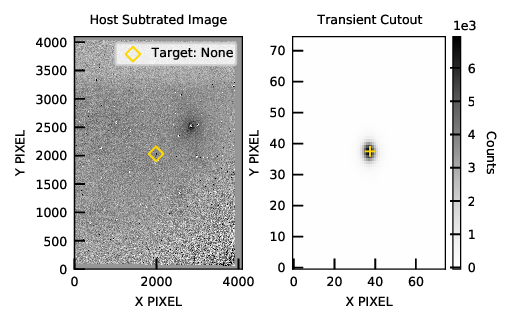

In [1]:
# Wand is used to display pdf images in jupyter notebooks - it is not needed for AutoPhoT
import wand

f = '/Users/seanbrennan/Desktop/autophot_example_REDUCED/example/example_APT_subtraction_QUICKLOOK.pdf'
from wand.image import Image as WImage
PSF = WImage(filename = f,
             resolution = 150)
PSF